# **Marketing Campaign Efficacy in the Banking Industry**

## **Problem Statement**

Our goal is to analyze the most effective marketing strategies for increasing customer engagement in banks. We aim to determine whether clients have opted for fixed deposits, identify the best strategies to boost customer acquisition, and find the target customer segment most likely to subscribe.

## **Motivation**

In the rapidly changing financial landscape, banks face intense pressure to make every marketing dollar count. By using the well-established Bank Marketing Dataset from the UCI repository, which records direct-marketing campaign outcomes for a Portuguese bank, we have a concrete foundation to explore the effectiveness of different outreach strategies (phone calls, contact timing, customer demographics) in predicting term deposit uptake. This project aims to convert raw campaign data into actionable insights, helping banks not only identify which tactics boost subscription rates, but also what kinds of customers are most receptive. Ultimately, the goal is to arm marketers with data-driven guidance to optimize engagement, boost acquisition, and deploy resources more efficiently.

## **Dataset**

Data Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014. [Link](https://https://archive.ics.uci.edu/dataset/222/bank+marketing)

----

In [2]:
## Data Overview

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import pandas as pd
csv_path = '/content/drive/MyDrive/bank-additional-full.csv'

# Read CSV (semicolon-separated)
banking = pd.read_csv(csv_path, sep=';')

# Check that it's loaded
print(banking.shape)
print(banking.columns.tolist()[:10])

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week']


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from bokeh.plotting import figure
from bokeh.io import output_notebook, output_file, show
from bokeh.models import Div
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6

# Enable inline plots
%matplotlib inline

try:
    plt.style.use('seaborn-v0_8-white')
except OSError:
    sns.set_theme(style="white")

sns.set_context("notebook")
output_notebook()


----

## **Column Exploration**

In [6]:
print("Shape of dataset:", banking.shape)
print("\nColumn names:\n", banking.columns.tolist())

Shape of dataset: (41188, 21)

Column names:
 ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [7]:
banking.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
banking.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
banking.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [11]:
banking.isnull().sum().sort_values(ascending=False)

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [12]:
for col in banking.columns:
    print(col, "→", (banking[col] == 'unknown').sum())

age → 0
job → 330
marital → 80
education → 1731
default → 8597
housing → 990
loan → 990
contact → 0
month → 0
day_of_week → 0
duration → 0
campaign → 0
pdays → 0
previous → 0
poutcome → 0
emp.var.rate → 0
cons.price.idx → 0
cons.conf.idx → 0
euribor3m → 0
nr.employed → 0
y → 0


In [13]:
for col in banking.columns:
    print(f"{col}: {banking[col].nunique()} unique values")

age: 78 unique values
job: 12 unique values
marital: 4 unique values
education: 8 unique values
default: 3 unique values
housing: 3 unique values
loan: 3 unique values
contact: 2 unique values
month: 10 unique values
day_of_week: 5 unique values
duration: 1544 unique values
campaign: 42 unique values
pdays: 27 unique values
previous: 8 unique values
poutcome: 3 unique values
emp.var.rate: 10 unique values
cons.price.idx: 26 unique values
cons.conf.idx: 26 unique values
euribor3m: 316 unique values
nr.employed: 11 unique values
y: 2 unique values


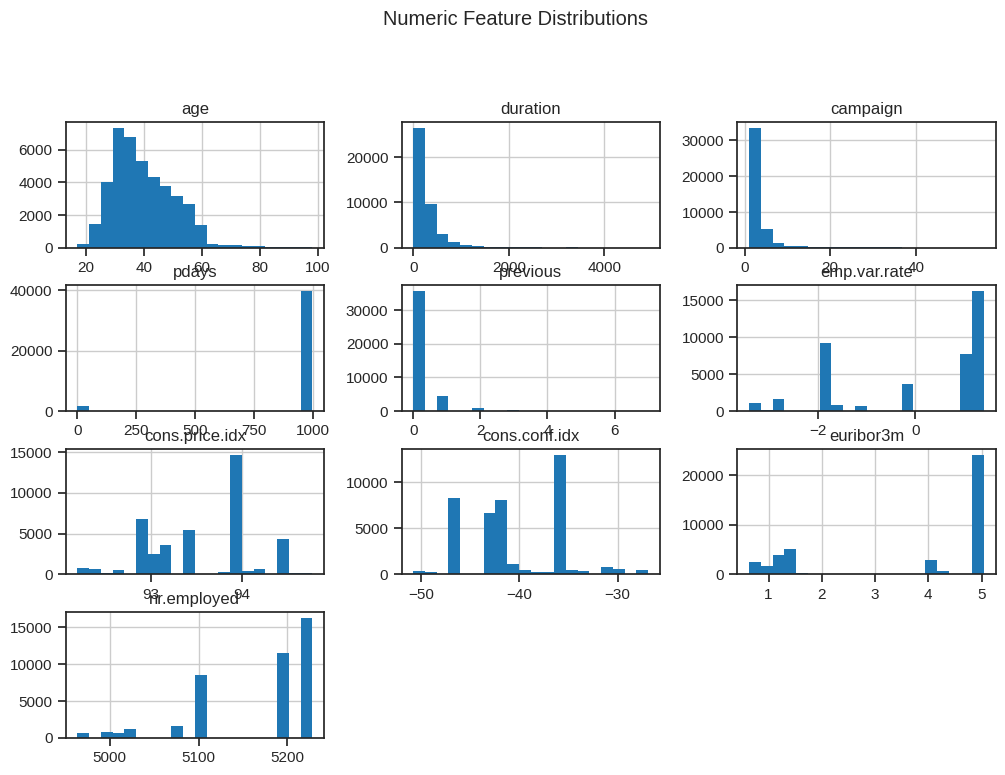

In [14]:
num_cols = banking.select_dtypes(include=np.number).columns
banking[num_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle("Numeric Feature Distributions", y=1.02)
plt.show()

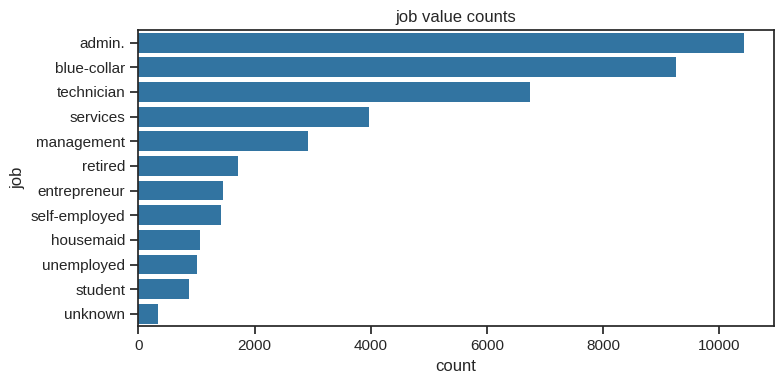

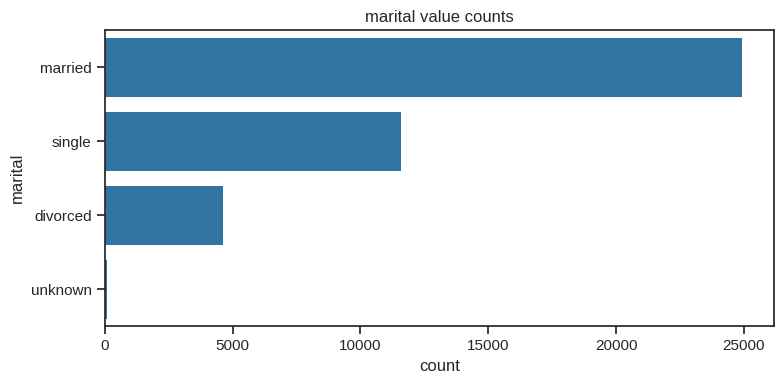

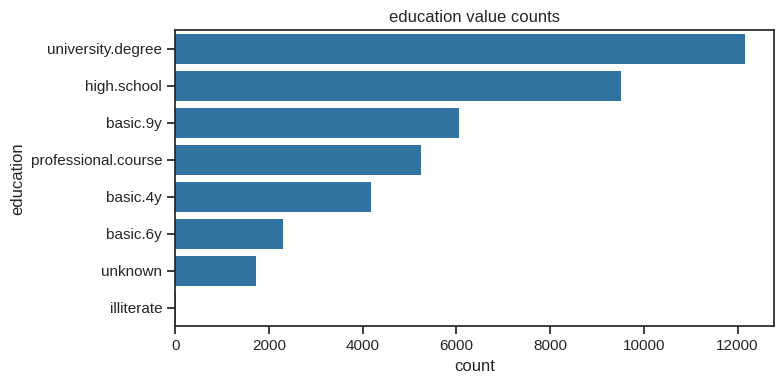

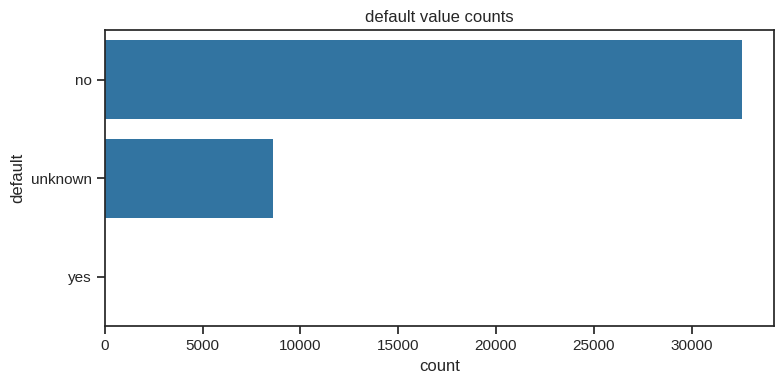

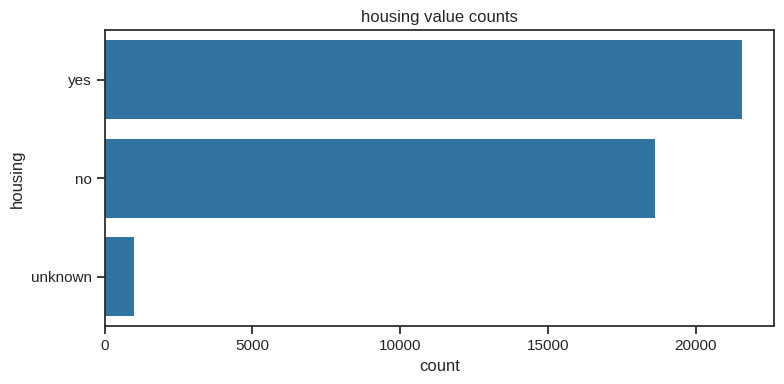

In [15]:
cat_cols = banking.select_dtypes(include='object').columns
for col in cat_cols[:5]:
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, data=banking, order=banking[col].value_counts().index)
    plt.title(f"{col} value counts")
    plt.tight_layout()
    plt.show()

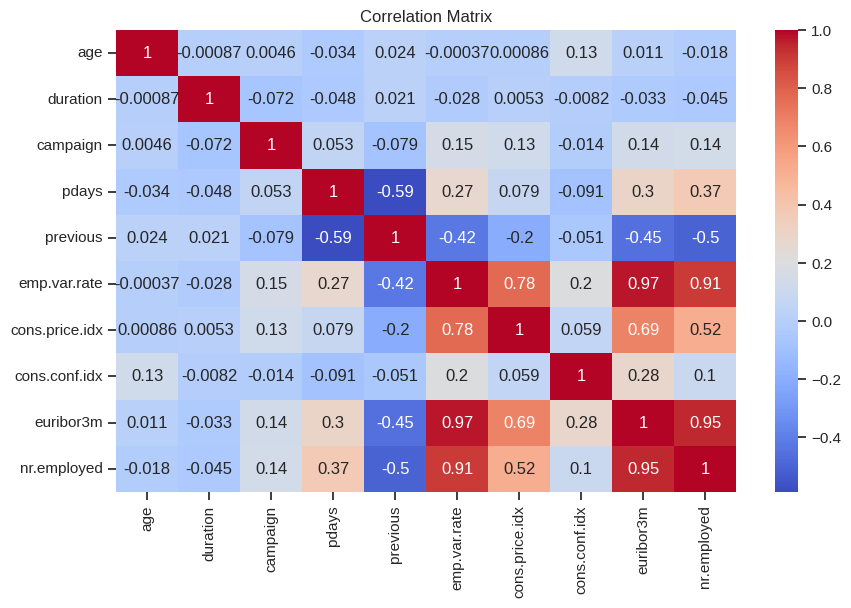

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(banking.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

/tmp/ipython-input-3531514338.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=banking, palette=['tomato', 'lightgreen'])


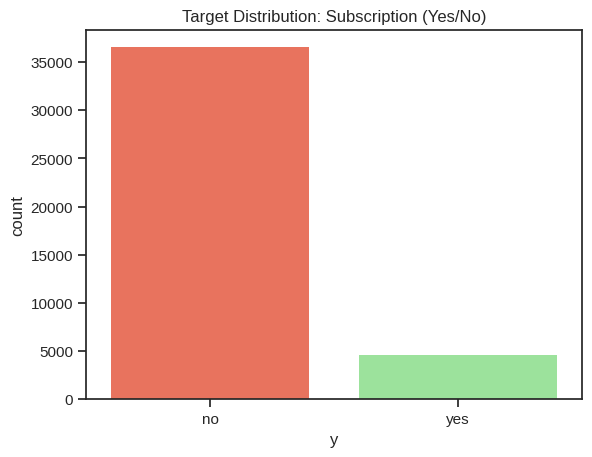

In [19]:
sns.countplot(x='y', data=banking, palette=['tomato', 'lightgreen'])
plt.title("Target Distribution: Subscription (Yes/No)")
plt.show()

### **Findings:**

The dataset represents over 41,000 customers targeted through a bank’s marketing campaigns to promote term deposits. Each record captures customer demographics, financial background, and campaign interaction details. Most customers are working adults in their 30s and 40s, primarily in administrative, technical, and blue-collar roles, with a large share holding university degrees and being married.

The data highlights that the majority of clients were reached via cell phone, usually contacted once or twice, and most interactions occurred in May. While many customers had housing loans, few held personal loans. Despite consistent outreach, only around 12% of customers subscribed to a term deposit, revealing a significant gap between engagement and conversion.

The economic indicators, such as employment rate and consumer confidence, appear to influence outcomes, as periods of stronger market conditions correlate with higher success rates. These findings suggest that refining customer targeting—based on job type, contact timing, and economic trends—could greatly improve campaign effectiveness and boost term deposit conversions.

---

## **Data Cleaning and Transformation**

**Data Quality check:**

Through data overview and granular analysis, we saw that certain columns ('pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m' and 'nr.employed') have irrelevant values and won't add relevant insights or value to the analysis. As a result, we are dropping these columns for better analysis and results.

In [21]:
banking = banking.drop(banking[['pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']], axis = 1)

**Analyzing null values**

In [22]:
print(banking.isnull().sum())

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
previous       0
poutcome       0
y              0
dtype: int64


There are no null or missing values in the data, therefore our dataset is relatively clean for further exploration. However, on a closer look, we see that certain columns have 'unknown' values which might have some other significance & meaning.
In the next step, we will look deeper into it.

**Analyzing 'Unknown' Values**

In [23]:
print("JOB: " ,banking['job'].unique())
print("The percentage of unknown values in job attribute is",round(((banking['job'].value_counts()['unknown']/banking['job'].count())*100),3),"% \n")

print("MARITAL: " ,banking['marital'].unique())
print("The percentage of unknown values in marital attribute is",round(((banking['marital'].value_counts()['unknown']/banking['marital'].count())*100),3),"% \n")

print("EDUCATION: " ,banking['education'].unique())
print("The percentage of unknown values in education attribute is",round(((banking['education'].value_counts()['unknown']/banking['education'].count())*100),3),"% \n")

print("DEFAULT: " ,banking['default'].unique())
print("The percentage of unknown values in default attribute is",round(((banking['default'].value_counts()['unknown']/banking['default'].count())*100),3),"% \n")

print("HOUSING: " ,banking['housing'].unique())
print("The percentage of unknown values in housing attribute is",round(((banking['housing'].value_counts()['unknown']/banking['housing'].count())*100),3),"% \n")

print("LOAN: " ,banking['loan'].unique())
print("The percentage of unknown values in loan attribute is",round(((banking['loan'].value_counts()['unknown']/banking['loan'].count())*100),3),"% \n")

JOB:  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
The percentage of unknown values in job attribute is 0.801 % 

MARITAL:  ['married' 'single' 'divorced' 'unknown']
The percentage of unknown values in marital attribute is 0.194 % 

EDUCATION:  ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
The percentage of unknown values in education attribute is 4.203 % 

DEFAULT:  ['no' 'unknown' 'yes']
The percentage of unknown values in default attribute is 20.873 % 

HOUSING:  ['no' 'yes' 'unknown']
The percentage of unknown values in housing attribute is 2.404 % 

LOAN:  ['no' 'yes' 'unknown']
The percentage of unknown values in loan attribute is 2.404 % 



Some customer details, such as job, marital status, education, and loan information, have a few “unknown” entries, but these are too few to affect the overall analysis. Removing them would mean losing valuable customer records and reducing the reliability of insights. To maintain data completeness and ensure accurate business conclusions, we’ll keep these “unknown” values as part of the dataset.

---

## **Preprocessing**

#### **Amending Columns**

**Age:**

As mentioned above, for the sake of easier analysis and visualisation, we are categorizing the 'age' variable into different groups ('18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85' and '86-100') to drill-down on important features of different age groups.

As such, we have changed the data type of 'age' from int to string.

In [24]:
for num in banking['age'].index:
  if banking['age'][num]>=17 and banking['age'][num]<=25:
    banking['age'][num] = '16 - 25'
  elif banking['age'][num]>=26 and banking['age'][num]<=35:
    banking['age'][num] = '26 - 35'
  elif banking['age'][num]>=36 and banking['age'][num]<=45:
    banking['age'][num] = '36 - 45'
  elif banking['age'][num]>=46 and banking['age'][num]<=55:
    banking['age'][num] = '46 - 55'
  elif banking['age'][num]>=56 and banking['age'][num]<=65:
    banking['age'][num] = '56 - 65'
  elif banking['age'][num]>=66 and banking['age'][num]<=75:
    banking['age'][num] = '66 - 75'
  elif banking['age'][num]>=76 and banking['age'][num]<=85:
    banking['age'][num] = '76 - 85'
  else:
    banking['age'][num] = '86 - 100'

# Converting the data type of age to string
banking['age'] = banking['age'].astype('str')
print(banking['age'].unique())

/tmp/ipython-input-3009838429.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  banking['age'][num] = '56 - 65'
/tmp/ipython-input-3009838429.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

['56 - 65' '36 - 45' '16 - 25' '26 - 35' '46 - 55' '66 - 75' '76 - 85'
 '86 - 100']


 **Education**:

The 'education' attribute includes the different education levels of clients targetted in the marketing campaign. To make the records more intuitive and reduce the number of education categories, we have converted the 3 categories ('basic.4y', 'basic.6y' and 'basic.9y') into 'Pre-High School' category.

In [25]:
mapping = {'basic.4y': 'pre.high.school', 'basic.6y': 'pre.high.school', 'basic.9y': 'pre.high.school'}
banking['education'] = banking['education'].replace(mapping)
banking['education'].unique()

array(['pre.high.school', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

**Duration**:

The 'duration' variable is the duration of the last call made with a client. We have converted the 'duration' variable from seconds to minutes and categorized into different minute buckets to understand how 'duration' factor affects the subscription rate.

In [26]:
for num in banking['duration'].index:
  if banking['duration'][num]>=0 and banking['duration'][num]<=599:
    banking['duration'][num] = '0 - 10'

  elif banking['duration'][num]>=600 and banking['duration'][num]<=1199:
    banking['duration'][num] = '10 - 20'

  elif banking['duration'][num]>=1200 and banking['duration'][num]<=1799:
    banking['duration'][num] = '20 - 30'

  elif banking['duration'][num]>=1800:
    banking['duration'][num] = '30+'

# Converting the data type of age to string
banking['duration'] = banking['duration'].astype('str')
banking['duration'].unique()

/tmp/ipython-input-2176708493.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  banking['duration'][num] = '0 - 10'
/tmp/ipython-input-2176708493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

array(['0 - 10', '20 - 30', '10 - 20', '30+'], dtype=object)

**Campaign:**

The 'campaign' variable represents the number of times a particular client was contacted.

We are converting the number of times a particular client was contacted into categories ('0-5', '5-10', 10-15', '15-20', '20-25', '25-30' and '30+') to understand how the count of contacting customers impacts the subscription rate in exploratory analysis.

In [27]:
for num in banking['campaign'].index:
  if banking['campaign'][num]>=0 and banking['campaign'][num]<5:
    banking['campaign'][num] = '0 - 5'
  elif banking['campaign'][num]>=5 and banking['campaign'][num]<10:
    banking['campaign'][num] = '5 - 10'
  elif banking['campaign'][num]>=10 and banking['campaign'][num]<15:
    banking['campaign'][num] = '10 - 15'
  elif banking['campaign'][num]>=15 and banking['campaign'][num]<20:
    banking['campaign'][num] = '15 - 20'
  elif banking['campaign'][num]>=20 and banking['campaign'][num]<25:
    banking['campaign'][num] = '20 - 25'
  elif banking['campaign'][num]>=25 and banking['campaign'][num]<=30:
    banking['campaign'][num] = '25 - 30'
  else:
    banking['campaign'][num] = '30+'

# Converting the data type of age to string
banking['campaign'] = banking['campaign'].astype('str')
banking['campaign'].unique()

/tmp/ipython-input-651267053.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  banking['campaign'][num] = '0 - 5'
/tmp/ipython-input-651267053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

array(['0 - 5', '5 - 10', '10 - 15', '15 - 20', '20 - 25', '25 - 30',
       '30+'], dtype=object)

**Default:**

The 'default' variable means whether the client contacted has credt in default or not. We are changing the 'default' variable's name to 'Credit_in_Default' to make the column easily understandable.

In [28]:
banking = banking.rename({'default': 'credit_in_default'}, axis=1)

**Y (Response Vairable):**

The response variable 'y' means whether the client contacted has subscribed to the bank services or not. We are changing the response variable's name from 'y' to 'Subscribed (Yes/No)' to make the data easily interpretable.

/tmp/ipython-input-1666519160.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  subscription_rate = sns.catplot(x='Subscribed (Yes/No)', kind= 'count', data=banking,


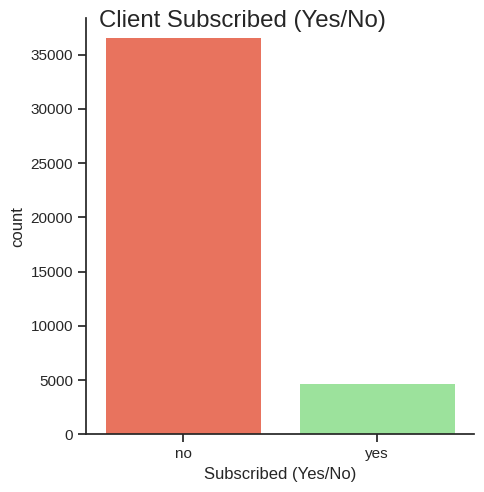

In [29]:
banking = banking.rename({'y': 'Subscribed (Yes/No)'}, axis=1)
subscription_rate = sns.catplot(x='Subscribed (Yes/No)', kind= 'count', data=banking,
                                palette=sns.color_palette(['Tomato', 'LightGreen']))
subscription_rate.fig.suptitle("Client Subscribed (Yes/No)" ,
               fontsize = 'x-large');

We can clearly see that people who said 'yes' (or subscribed to bank services) are approximately 10% of the total respondents, indicating data imbalance. We will keep this mind when performing exploratory and granular analysis.

-----

In [31]:
banking.head()

,age,job,marital,education,credit_in_default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,Subscribed (Yes/No)
0,56 - 65,housemaid,married,pre.high.school,no,no,no,telephone,may,mon,0 - 10,0 - 5,0,nonexistent,no
1,56 - 65,services,married,high.school,unknown,no,no,telephone,may,mon,0 - 10,0 - 5,0,nonexistent,no
2,36 - 45,services,married,high.school,no,yes,no,telephone,may,mon,0 - 10,0 - 5,0,nonexistent,no
3,36 - 45,admin.,married,pre.high.school,no,no,no,telephone,may,mon,0 - 10,0 - 5,0,nonexistent,no
4,56 - 65,services,married,high.school,no,no,yes,telephone,may,mon,0 - 10,0 - 5,0,nonexistent,no


----

## **Feature Importance**

To identify which features have the strongest impact, we used a Random Forest classifier — a popular decision tree–based model. Categorical variables were converted into numerical format using one-hot encoding, and the target variable ‘y’ was excluded from the predictors. A few hyperparameters were manually tuned to improve the model’s overall performance and accuracy.

/tmp/ipython-input-1009269883.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')


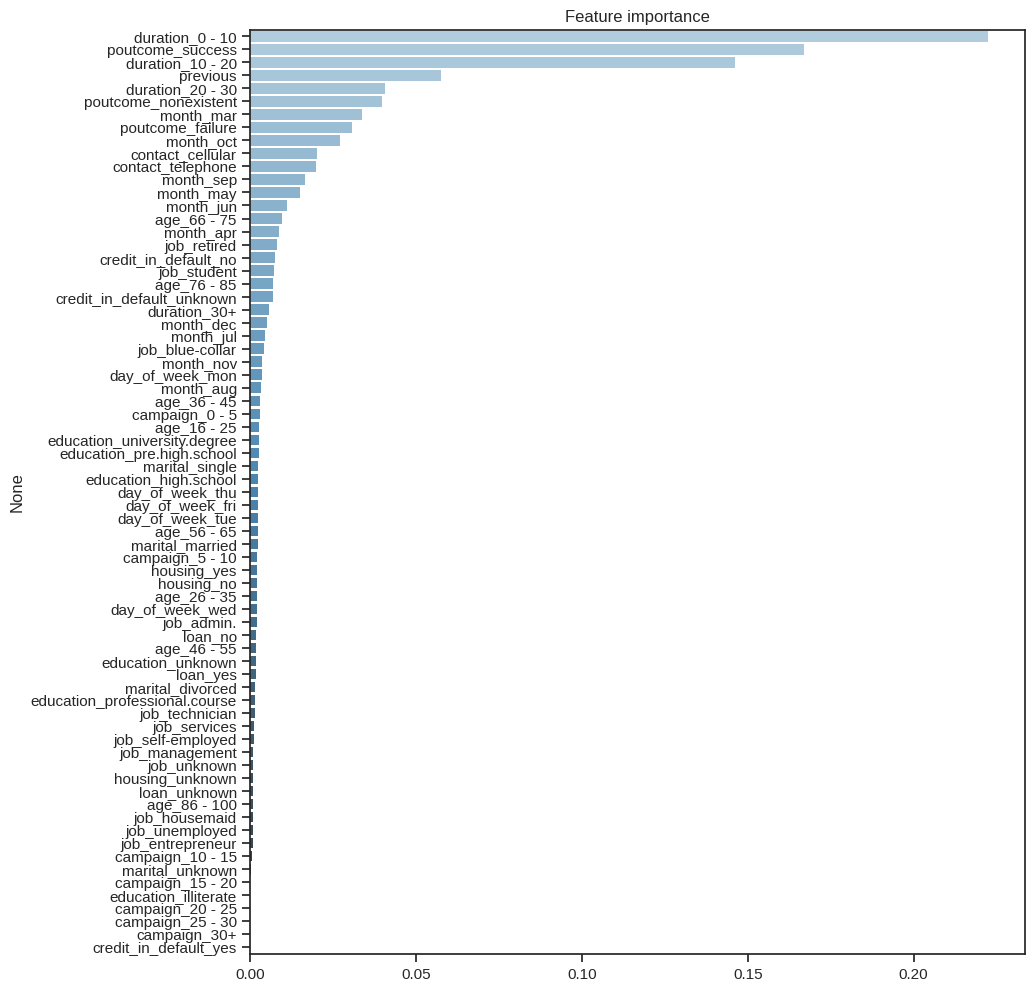

In [32]:
from sklearn.ensemble import RandomForestClassifier
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
# One-hot encode
banking_dummies = pd.get_dummies(banking)
# Drop redundant columns (for features with two unique values)
x, y = banking_dummies.drop(['Subscribed (Yes/No)_yes', 'Subscribed (Yes/No)_no'], axis=1), banking['Subscribed (Yes/No)']
# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

The feature importance results show that duration, previous, and poutcome are the strongest predictors of whether a customer subscribes to a term deposit. In the next section, we’ll explore how these key factors relate to the target outcome. We now move forward to the next stage of our analysis — Exploratory Data Analysis (EDA).

----

## **Exploratory Data Analysis (EDA)**

### **1. Details of the Customers Targeted**

**A. Top three age groups with the highest subscription rates**

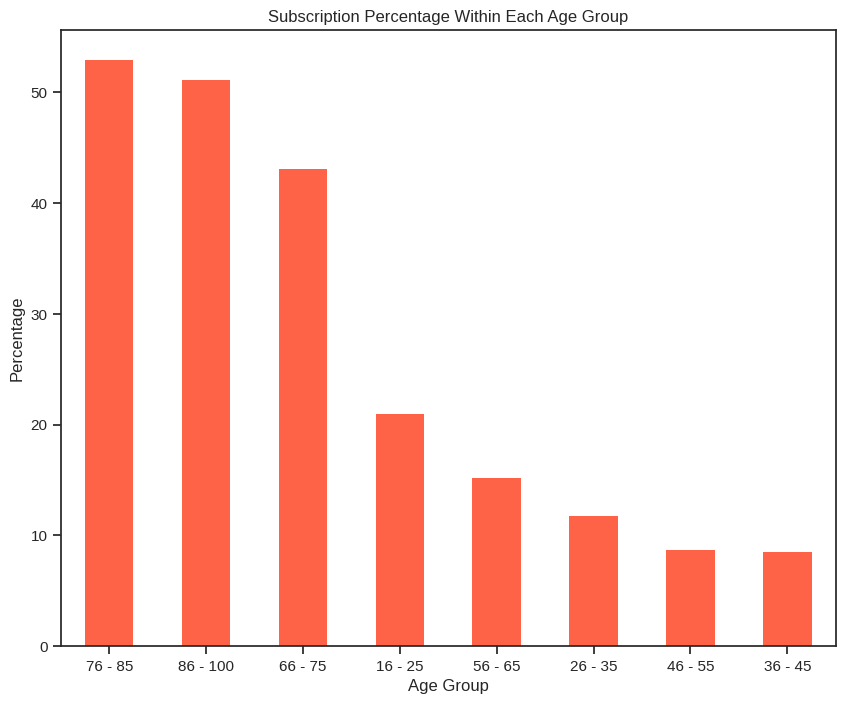

In [33]:
age_suscribed = banking[banking['Subscribed (Yes/No)'] == 'yes']['age'].value_counts().sort_index(ascending=False)
age_not_suscribed = banking[banking['Subscribed (Yes/No)'] == 'no']['age'].value_counts().sort_index(ascending=False)

age_subscribed_prop = round((age_suscribed/(age_not_suscribed+age_suscribed)*100),2).sort_values(ascending = False)
age_subscribed_prop


age_subscribed_prop.plot(kind='bar',figsize=(10,8),color="tomato")
plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.title('Subscription Percentage Within Each Age Group')
plt.xticks(rotation = 0)

plt.show();

The age groups **76–85, 86–100, and 66–75** show the highest subscription rates, indicating that older customers are more likely to invest in term deposits. To address the imbalance in customer counts across age ranges, we calculated the percentage of subscriptions within each group rather than raw totals. This normalization ensures that insights reflect true customer behavior rather than being skewed by group size differences, helping the bank focus marketing strategies on high-potential age segments.

**B. We’ll examine how marital status influences subscription behavior within the three most responsive age groups — 66–75, 76–85, and 86–100 — to understand whether being married, single, or divorced affects the likelihood of subscribing among these older customer segments.**

In [34]:
top_age_marital_status = banking[(banking['Subscribed (Yes/No)'] == 'yes') & ((banking['age'] == '76 - 85') |
(banking['age'] == '86 - 100') | (banking['age'] == '66 - 75'))].groupby('education')['age'].count().sort_values(ascending = False)

print(top_age_marital_status)
print("The top 3 age categories who subscribed the most (as seen above), {}% of those people are married.".
format(round((top_age_marital_status[0]/top_age_marital_status.sum())*100, 2)))

education
pre.high.school        164
unknown                 36
professional.course     32
university.degree       31
high.school             26
illiterate               1
Name: age, dtype: int64
The top 3 age categories who subscribed the most (as seen above), 56.55% of those people are married.


/tmp/ipython-input-3893073270.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  format(round((top_age_marital_status[0]/top_age_marital_status.sum())*100, 2)))


The top 3 age categories who subscribed the most (as seen above), 56.55% of those people are married.
Out of the top 3 age groups that had the highest subscription rate **('76-85', '86-100' and '66-75')**, approximately 60% of those people are married.

**C. Based on different job profiles, which client segments responded most positively to specific marketing strategies, showing the highest subscription rates?**

In [35]:
job_suscribed = banking[banking['Subscribed (Yes/No)'] == 'yes']['job'].value_counts().sort_index(ascending=True)
job_not_suscribed = banking[banking['Subscribed (Yes/No)'] == 'no']['job'].value_counts().sort_index(ascending=True)

job_subscribed_percentage = round((job_suscribed/(job_not_suscribed+job_suscribed))*100,2).sort_values(ascending = False)
print(job_subscribed_percentage)

job
student          31.43
retired          25.23
unemployed       14.20
admin.           12.97
management       11.22
unknown          11.21
technician       10.83
self-employed    10.49
housemaid        10.00
entrepreneur      8.52
services          8.14
blue-collar       6.89
Name: count, dtype: float64


**Students** have had the highest subscription rate to bank term deposit. This shows that marketing campaign appears to be most successful on students across all the job profiles.

**D. Campaign success rate for each education level.**

/tmp/ipython-input-3310691500.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  edu_result = sns.catplot(x = 'Subscribed (Yes/No)',


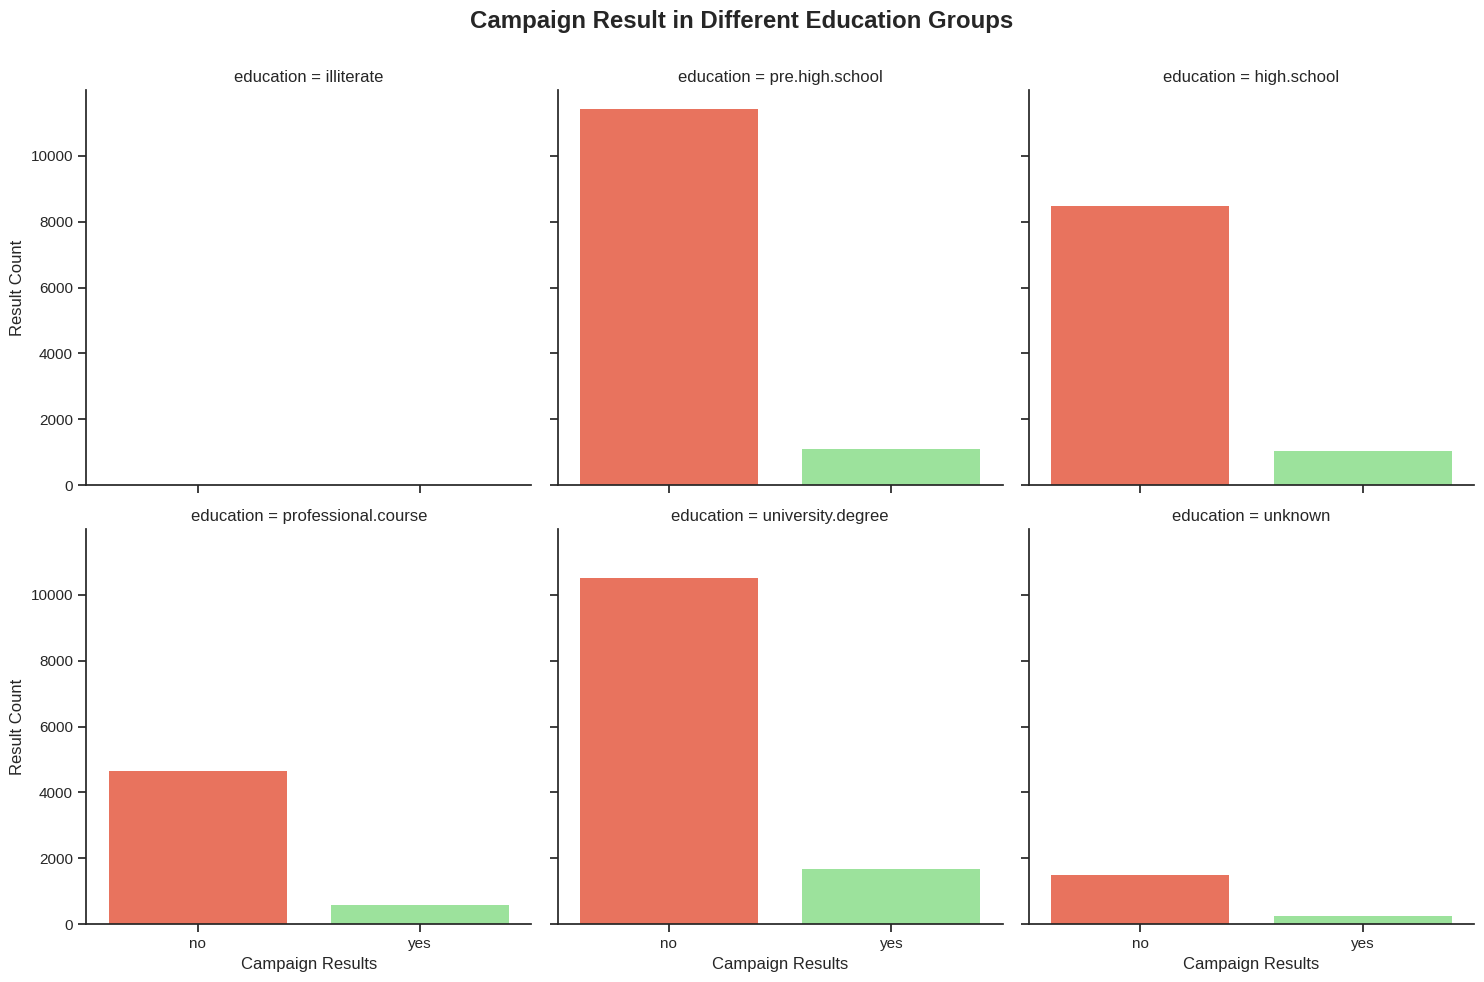

In [36]:
education_order = ['illiterate',
                  'pre.high.school',
                  'high.school',
                  'professional.course',
                   'university.degree',
                   'unknown']

edu_result = sns.catplot(x = 'Subscribed (Yes/No)',
            data = banking,
            kind = 'count',
            col = 'education',
            col_wrap = 3,
            col_order = education_order,
            palette=sns.color_palette(['Tomato', 'LightGreen']))

edu_result.fig.suptitle("Campaign Result in Different Education Groups" ,
               fontsize = 'x-large' ,
               fontweight = 'bold' )

edu_result.fig.subplots_adjust( top = 0.9 )

edu_result.set_axis_labels( "Campaign Results" , "Result Count" )

plt.show()

The above subplots showcase the subscription outcome ("Yes" or "No") within each education group.

To overcome the issue of unbalanced data across all education groups, we are going to visualize the subscription rate of each group.

In [37]:
banking_yes = banking[banking['Subscribed (Yes/No)'] == 'yes']
a = banking_yes.education.value_counts()
b = banking.education.value_counts()
c = a/b*100
c = c.to_frame(name = 'success percentage(%)')
c.reset_index(inplace = True)
c = c.rename(columns = {'index':'education'})
c["success percentage(%)"] = round(c["success percentage(%)"],2)
c

,education,success percentage(%)
0,high.school,10.84
1,illiterate,22.22
2,pre.high.school,8.70
3,professional.course,11.35
4,university.degree,13.72
5,unknown,14.50


/tmp/ipython-input-1795103516.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  edu_pct = sns.catplot(x = 'education',


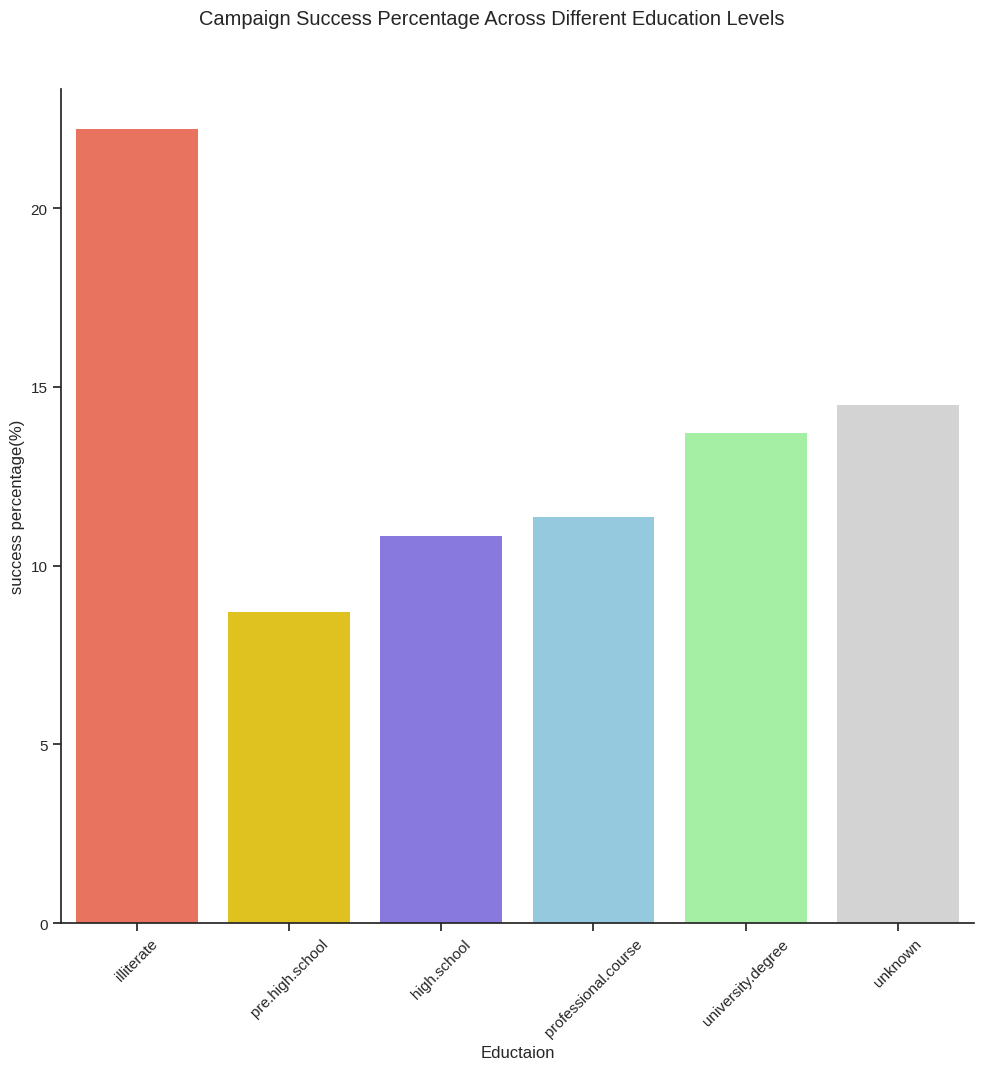

In [38]:
edu_pct = sns.catplot(x = 'education',
            y = 'success percentage(%)',
            data = c,
            kind = 'bar',
            order = education_order, height=10,aspect=1,
            palette = sns.color_palette(['Tomato', 'Gold', 'MediumSlateBlue', 'SkyBlue', 'PaleGreen', 'LightGray']))

edu_pct.fig.subplots_adjust(top=0.9)
edu_pct.fig.suptitle('Campaign Success Percentage Across Different Education Levels')

plt.xlabel('Eductaion')
plt.ylabel('success percentage(%)')

plt.xticks(rotation=45)

plt.show()

Interestingly, the illiterate group shows nearly double the success rate of others, likely due to its very small sample size (only 18 records). Among the remaining groups, success rates generally rise with higher education levels.

----


## **2. Subscription Rate based on Contact Type and Month**

**A. Identify the month with the highest subscription count.**

In [39]:
df = banking.groupby(['month','Subscribed (Yes/No)']).agg({'Subscribed (Yes/No)': 'count'})
df2 = df.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df2.head(14)

/tmp/ipython-input-865378854.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df2 = df.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))


Subscribed (Yes/No)
month month Subscribed (Yes/No)                     
apr   apr   no                             79.521277
            yes                            20.478723
aug   aug   no                             89.397863
            yes                            10.602137
dec   dec   no                             51.098901
            yes                            48.901099
jul   jul   no                             90.953443
            yes                             9.046557
jun   jun   no                             89.488530
            yes                            10.511470
mar   mar   no                             49.450549
            yes                            50.549451
may   may   no                             93.565255
            yes                             6.434745

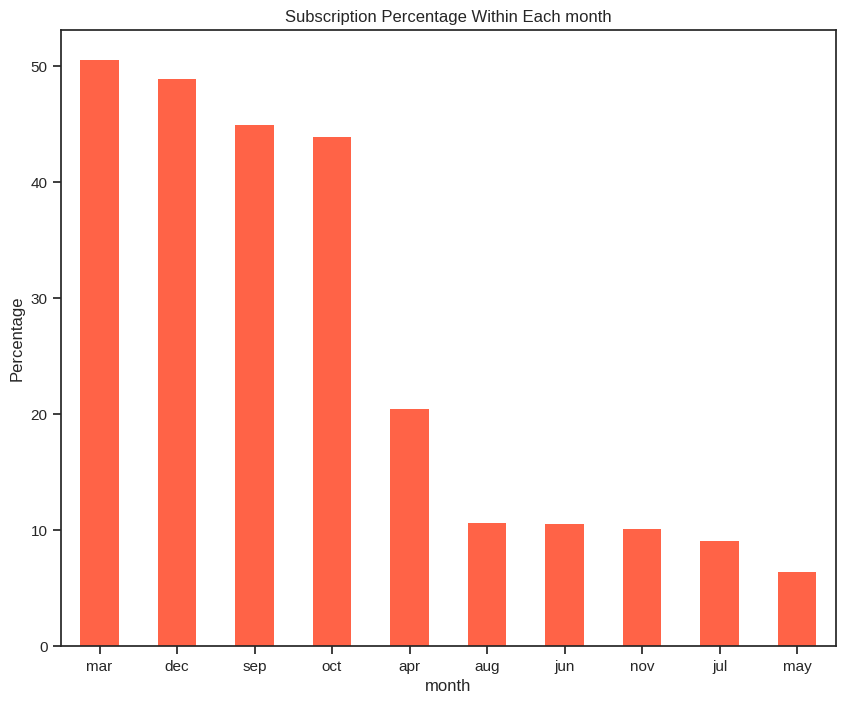

In [40]:
month_subscribed = banking[banking['Subscribed (Yes/No)'] == 'yes']['month'].value_counts().sort_index(ascending=False)
month_not_subscribed = banking[banking['Subscribed (Yes/No)'] == 'no']['month'].value_counts().sort_index(ascending=False)

month_subscribed_prop = round((month_subscribed/(month_subscribed+month_not_subscribed)*100),2).sort_values(ascending = False)
month_subscribed_prop


month_subscribed_prop.plot(kind='bar',figsize=(10,8),color="tomato")
plt.xlabel("month")
plt.ylabel("Percentage")
plt.title('Subscription Percentage Within Each month')
plt.xticks(rotation = 0)

plt.show();

**March** witnessed the highest percentage of subscriptions and 50.5% of those who contacted subscribed to bank services. However, **May** had the least percentage of people who subscribed - only 6.43%.

**B. Determine which contact method resulted in the highest subscription rate.**

In [42]:
df3 = banking.groupby(['contact','Subscribed (Yes/No)']).agg({'Subscribed (Yes/No)': 'count'})
df4 = df3.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df4

/tmp/ipython-input-3500608996.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df4 = df3.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))


Subscribed (Yes/No)
contact   contact   Subscribed (Yes/No)                     
cellular  cellular  no                             85.262393
                    yes                            14.737607
telephone telephone no                             94.768679
                    yes                             5.231321

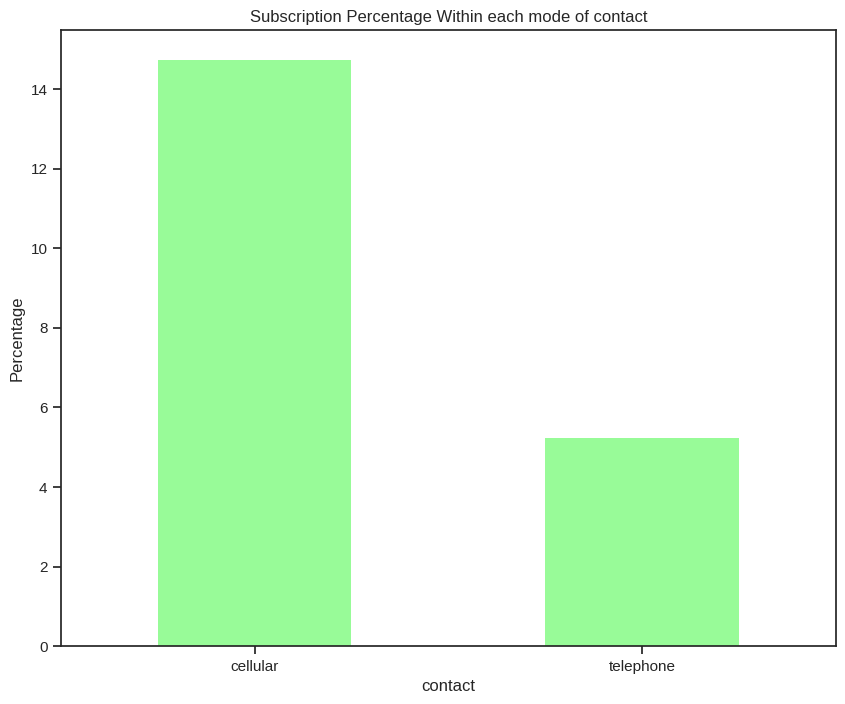

In [43]:
contact_subscribed = banking[banking['Subscribed (Yes/No)'] == 'yes']['contact'].value_counts().sort_index(ascending=False)
contact_not_subscribed = banking[banking['Subscribed (Yes/No)'] == 'no']['contact'].value_counts().sort_index(ascending=False)

contact_subscribed_prop = round((contact_subscribed/(contact_subscribed+contact_not_subscribed)*100),2).sort_values(ascending = False)
contact_subscribed_prop


contact_subscribed_prop.plot(kind='bar',figsize=(10,8),color="palegreen")
plt.xlabel("contact")
plt.ylabel("Percentage")
plt.title('Subscription Percentage Within each mode of contact')
plt.xticks(rotation = 0)

plt.show();

Out of all the people contacted via cellular, 14.73% of people subscribed to bank services; whereas only 5.23% subscribed out of all the people contacted via telephone.

As such, **cellular** was more effective than telephone

**C. Assess whether having a housing or personal loan influenced subscription outcomes.**

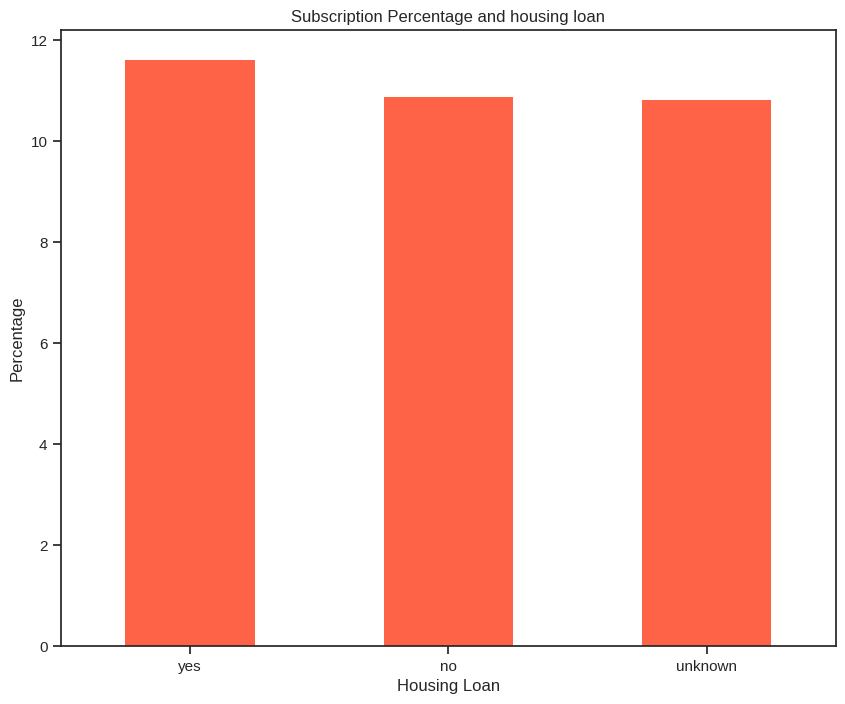

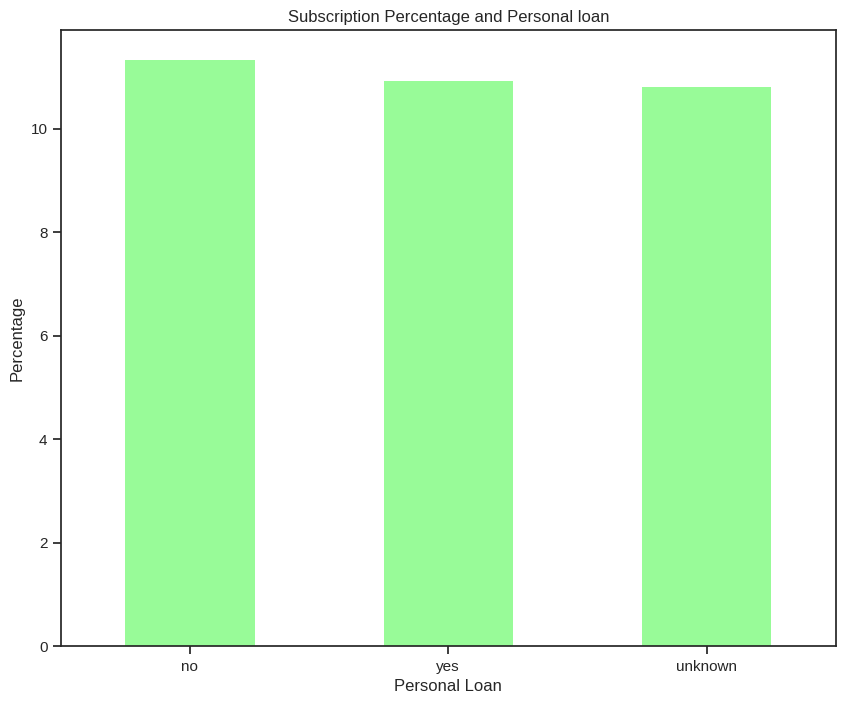

In [46]:
housing_subscribed = banking[banking['Subscribed (Yes/No)'] == 'yes']['housing'].value_counts().sort_index(ascending=False)
housing_not_subscribed = banking[banking['Subscribed (Yes/No)'] == 'no']['housing'].value_counts().sort_index(ascending=False)

housing_subscribed_prop = round((housing_subscribed/(housing_subscribed+housing_not_subscribed)*100),2).sort_values(ascending = False)
housing_subscribed_prop


housing_subscribed_prop.plot(kind='bar',figsize=(10,8),color="tomato")
plt.xlabel("Housing Loan")
plt.ylabel("Percentage")
plt.title('Subscription Percentage and housing loan')
plt.xticks(rotation = 0)

plt.show();

housing_subscribed = banking[banking['Subscribed (Yes/No)'] == 'yes']['loan'].value_counts().sort_index(ascending=False)
housing_not_subscribed = banking[banking['Subscribed (Yes/No)'] == 'no']['loan'].value_counts().sort_index(ascending=False)

housing_subscribed_prop = round((housing_subscribed/(housing_subscribed+housing_not_subscribed)*100),2).sort_values(ascending = False)
housing_subscribed_prop


housing_subscribed_prop.plot(kind='bar',figsize=(10,8),color="PaleGreen")
plt.xlabel("Personal Loan")
plt.ylabel("Percentage")
plt.title('Subscription Percentage and Personal loan')
plt.xticks(rotation = 0)

plt.show();

As shown in table 1, approximately 10% of people subscribed to bank services irrespective of whether they had a housing loan. Similarly, as shown in table 2, approximately 10% people subscriped irrespective of whether they had a personal loan or not.

As a result, having a housing loan or personal loan doesn't have a significant impact on the client's decision to take a subscription with the bank.

**D. Examine how education level relates to loan status among customers who subscribed to the bank’s services.**

The campaign success rate generally rises with higher education levels, excluding the illiterate group due to limited data. Having a personal loan shows little influence on subscription outcomes, as success rates remain nearly identical across all loan categories (yes, no, and unknown). This section explores whether combining these two factors, education and loan status, reveals any interaction effects on campaign performance.

In [47]:
banking_yes = banking[banking['Subscribed (Yes/No)'] == 'yes']
banking_yes.loc[banking_yes['education'] == 'high.school']
banking_yes.groupby(['education','loan']).agg({'Subscribed (Yes/No)': 'count'})

# plotting count plots on education & loan using Bokeh
output_notebook()
output_file("education_loan.html")

education_level = ['High School', 'Pre High School', 'Professional Course', 'University Degree']
loan_status = ['Yes', 'No', 'Unknown']

data = {'education' : education_level,
        'Yes'   : [150, 162, 85, 243],
        'No'   : [860, 896, 494, 1393],
        'Unknown'   : [21, 31, 16, 34]}

x = [ (education, loan) for education in education_level for loan in loan_status ]
counts = sum(zip(data['Yes'], data['No'], data['Unknown']), ())

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), width = 1000, height=400, title="Loan Status Counts by Education", y_axis_label = 'Count',
           toolbar_location=None, tools="")

p.vbar(x='x', top='counts', width=1, source=source, line_color="white",
       fill_color=factor_cmap('x', palette=Spectral6, factors=loan_status, start=1, end=2))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

In [48]:
# Percentage of each loan groups for every education level
banking_edu_loan = banking_yes.groupby(['education','loan']).agg({'Subscribed (Yes/No)': 'count'})
banking_loan_perct = banking_edu_loan.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
banking_loan_perct

# which eductaion and loan pair has the highest subscription rate?
output_file("education_loan_pct.html")

education_level = ['High School', 'Pre High School', 'Professional Course', 'University Degree']
loan_status = ['Yes', 'No', 'Unknown']

data = {'education' : education_level,
        'Yes': [14.5, 14.8, 14.3, 14.6],
        'No': [83.4, 82.2, 83, 83.4],
        'Unknown': [2, 2.8, 2.7, 2]}

x = [ (education, loan) for education in education_level for loan in loan_status ]
counts = sum(zip(data['Yes'], data['No'], data['Unknown']), ())

source = ColumnDataSource(data=dict(x=x, counts=counts))

p_1 = figure(x_range=FactorRange(*x), width = 1000, height=400, title="Success Rate for Each Loan Group of Every Education Level",
           y_axis_label = 'Percentage', toolbar_location=None, tools="")

p_1.vbar(x='x', top='counts', width=1, source=source, line_color="white",
       fill_color=factor_cmap('x', palette=Spectral6, factors=loan_status, start=1, end=2))

p_1.y_range.start = 0
p_1.x_range.range_padding = 0.1
p_1.xaxis.major_label_orientation = 1
p_1.xgrid.grid_line_color = None

show(p_1)

/tmp/ipython-input-3660499522.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  banking_loan_perct = banking_edu_loan.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))


Customers **without personal loans** are far more likely to subscribe than those with loans across all education levels. The campaign performed best among **high school graduates** **without personal loans**, achieving an 84.3% success rate, followed closely by **university graduates without loans**, with only a 0.0001% difference. On the other hand, customers from professional course backgrounds with personal loans show the lowest subscription rate at 14.2%.

Therefore, marketing efforts should prioritize customers without personal loans, particularly those with high school or university education backgrounds.

**E. Examine how job profile relates to loan status among customers who subscribed to the bank’s services.**

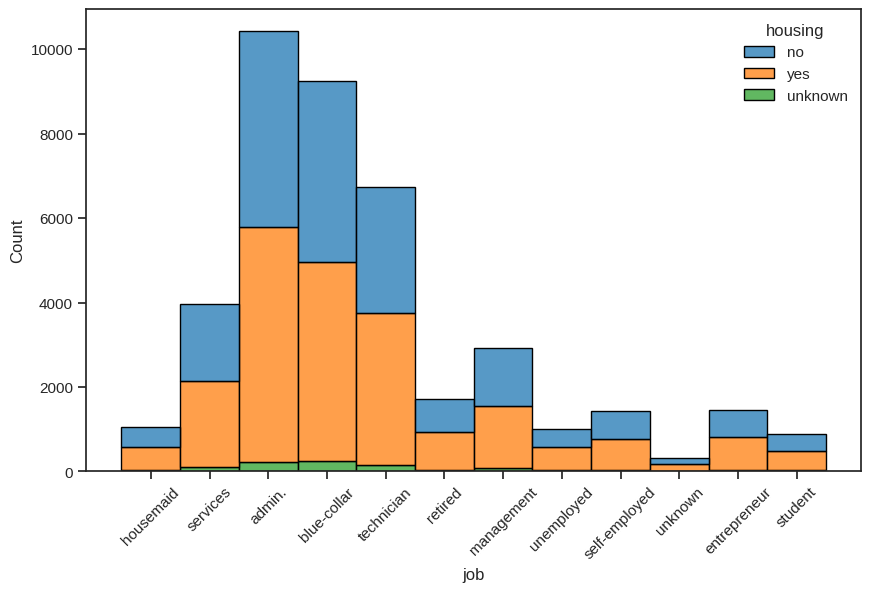

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
sns.histplot(binwidth=10, x="job", hue="housing", data=banking, stat="count", multiple="stack")
plt.xticks(rotation=45);

The proportion of customers with and without housing loans remains fairly consistent across different job types. This supports the earlier finding that housing loans do not significantly influence subscription decisions. The graph instead suggests that job status serves as a stronger indicator of a customer’s likelihood to subscribe to banking services.

---

## **3. Impact of Campaign on the Clients**

**A. How does the outcome of previous campaigns influence the overall marketing strategy?**

Aim to drill-down on the interaction between previous campaign outcome and the subscription rate

In [51]:
yxpoutcome = pd.crosstab(index=banking['poutcome'],
            columns=banking['Subscribed (Yes/No)'])
yxpoutcome.style.set_caption("Table 1")

Subscribed (Yes/No),no,yes
poutcome,,
failure,3647,605
nonexistent,32422,3141
success,479,894


In [52]:

yxpoutcome_prop = pd.crosstab(index=banking['poutcome'],
            columns=banking['Subscribed (Yes/No)'],
            normalize = 'index')
yxpoutcome_prop.style.set_caption("Table 2")

Subscribed (Yes/No),no,yes
poutcome,,
failure,0.857714,0.142286
nonexistent,0.911678,0.088322
success,0.348871,0.651129


To normalize the results, we converted the subscription counts for each campaign outcome in Table 1 into percentage form, shown in Table 2. In the next step, we will visualize the subscription success rates for each previous campaign outcome (failure, nonexistent, and success) to better understand their impact on current performance.

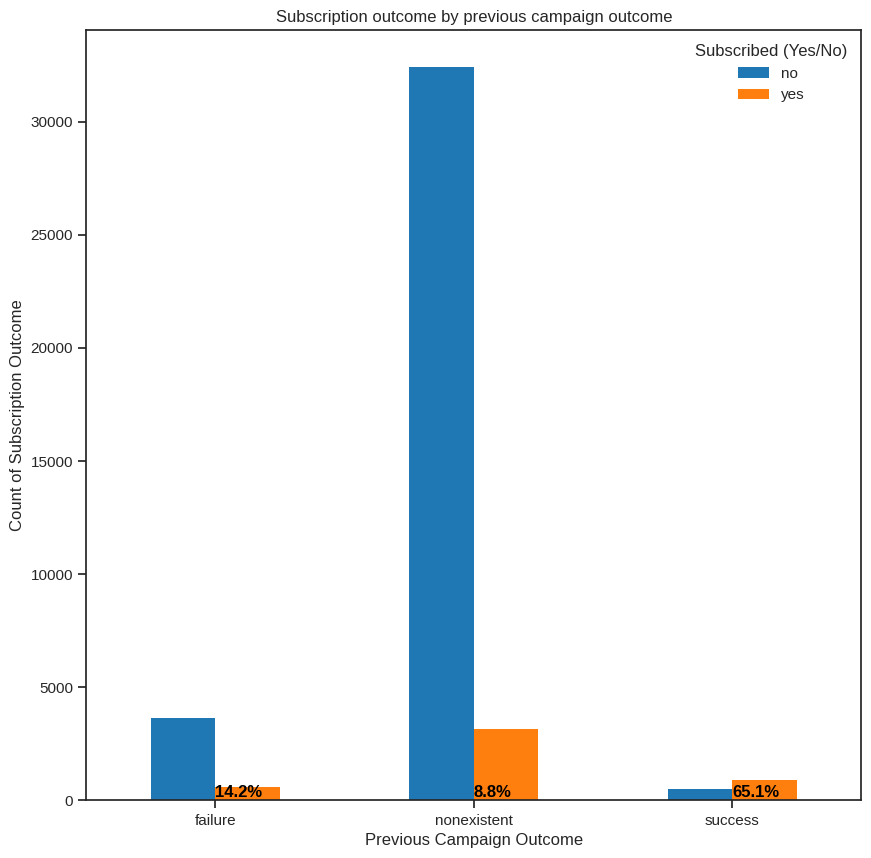

In [53]:
pd.crosstab(banking.poutcome,banking['Subscribed (Yes/No)']).plot(kind='bar', figsize = (10,10))
plt.title('Subscription outcome by previous campaign outcome')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Count of Subscription Outcome')
plt.xticks(rotation = 0)

for n, x in enumerate([*yxpoutcome.index.values]):
    for (column, proportion, y_loc) in zip(yxpoutcome_prop,
                                  yxpoutcome_prop.loc[x],
                                   yxpoutcome_prop.loc[x].cumsum()):
        if column == 'yes':
          plt.text(x=n,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%',
                 color="black",
                 fontsize=12,
                 fontweight="bold",
                 ha='left', va='bottom'
                 )

The Y-axis shows the count of subscription outcomes, while the percentages above represent how many clients subscribed for each outcome. The chart reveals that only campaigns labeled as success led to more subscriptions than non-subscriptions, with a 65.1% success rate.

**Interestingly, even failed campaigns produced better results than having no campaign at all, as 14.2% of clients subscribed after a failed campaign compared to only 8.8% when there was no previous contact.**

**B. Based on the previous campaign outcomes ('success', 'failure' and 'nonexistent'), what is the optimal number of times the bank should contact the clients?**

We normalized the count of each campaign outcome across the number of contacts by converting them into probabilities. These probabilities are distributed by previous, so each row sums to 1. This approach follows Bayes’ theorem, meaning that given the number of previous contacts, we can estimate the likelihood of success or failure. This crosstab allows us to explore how poutcome and previous interact and influence campaign performance.

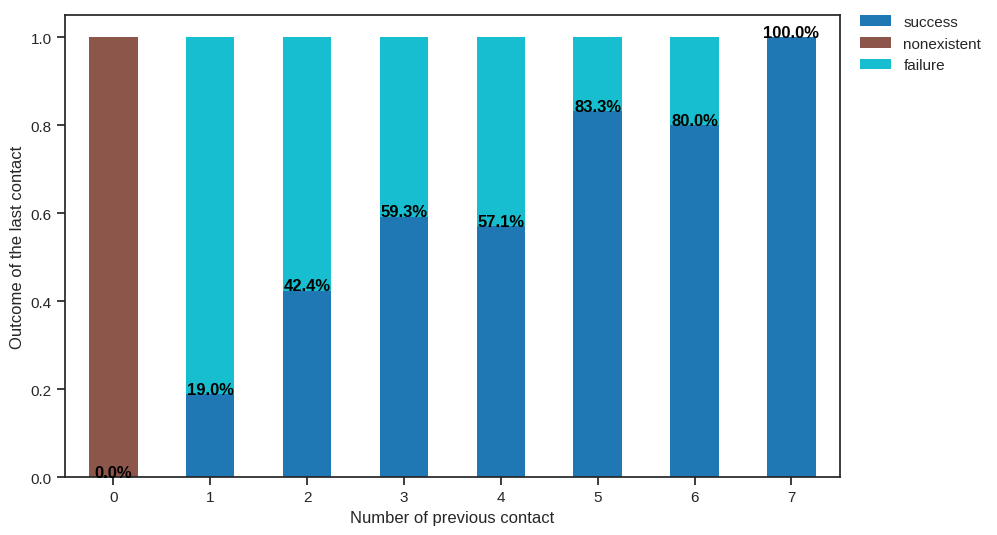

In [54]:
previousxpoutcome = pd.crosstab(index=banking['previous'],
            columns=banking['poutcome'])

previousxpoutcome_prop = pd.crosstab(index=banking['previous'],
            columns=banking.poutcome,
            normalize="index")

def swap_columns(previousxpoutcome_prop, col1, col2):
    col_list = list(previousxpoutcome_prop.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    previousxpoutcome_prop = previousxpoutcome_prop[col_list]
    return previousxpoutcome_prop

previousxpoutcome_prop = swap_columns(previousxpoutcome_prop, 'failure', 'success')

previousxpoutcome_prop.plot(kind='bar',
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))

plt.legend(loc="lower right", ncol=1)
plt.xlabel("Number of previous contact", rotation = 0)
plt.ylabel("Outcome of the last contact")
plt.xticks(rotation = 0)

plt.legend(loc='best', bbox_to_anchor=(0.7,0.53,0.5,0.5))

for n, x in enumerate([*previousxpoutcome.index.values]):
    for (column, proportion, y_loc) in zip(previousxpoutcome_prop,
                                  previousxpoutcome_prop.loc[x],
                                   previousxpoutcome_prop.loc[x].cumsum()):
        if column == 'success':
          plt.text(x=n,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%',
                 color="black",
                 fontsize=12,
                 fontweight="bold",
                 ha = 'center')


plt.show()

The dark-blue shaded region ('success') showcases the percentage of success for each count of client contacted.

We can clearly see that the successful campaign rate rises as the number of contacts made per client increases. For example, when clients are contacted five times, the successful campaign rate reaches 83.3%.

**As the number of contacts made per client increases, the campaign success rate rises. This indicates that efforts made to contact clients does make an influence and improve the results**

---

## **4. Summary of Latest Client Contact Details**

**A. How does the day of the week influence a client’s likelihood to subscribe to the bank’s services?**

In [55]:
banking_yes = banking[banking['Subscribed (Yes/No)'] == 'yes']

a1 = banking_yes.day_of_week.value_counts()
b1 = banking.day_of_week.value_counts()
c1 = a1/b1
c1.sort_values(ascending=False)
c1.to_frame()

,count
day_of_week,
fri,0.108087
mon,0.099483
thu,0.121188
tue,0.117800
wed,0.116671


**Day of week** has no individual significant impact on whether a person will subscribe to bank services. This shows that contacting the client any day of the week won't affect his decision!

**B. Identify the optimal call duration that results in the highest customer subscription rate.**

In [56]:
duration_subscribed = banking[banking['Subscribed (Yes/No)'] == 'yes']['duration'].value_counts().sort_index(ascending=False)
duration_not_subscribed = banking[banking['Subscribed (Yes/No)'] == 'no']['duration'].value_counts().sort_index(ascending=False)

duration_subscribed_prop = round((duration_subscribed/(duration_not_subscribed+duration_subscribed))*100,2).sort_values(ascending = False)


duration_subscribed_prop_df = duration_subscribed_prop.to_frame(name = 'Success Percentage')
duration_subscribed_prop_df.reset_index(inplace = True)
duration_subscribed_prop_df = duration_subscribed_prop_df.rename(columns = {'index':'duration (mins)'})
duration_subscribed_prop_df.head(14)
highlight= lambda x: ['background: red' if x.name in [0, 13] else '' for i in x]
duration_subscribed_prop_df.style.apply(highlight,axis=1)

,duration,Success Percentage
0,20 - 30,63.040000
1,30+,59.410000
2,10 - 20,46.200000
3,0 - 10,7.820000


As call duration increases, the success rate for subscriptions increases(shown above).

Optimal contact duration appears to fall within 20-30 minutes. However, this is only up to the 50-minute call duration mark. Any call duration beyond 30-minutes shows diminishing success rate. This is surprising because a longer call time would be thought to ensue trust with the client. However, too long a call maybe becomes burdensome and leads to apprehension from the client. As such, bank should take note of this when contacting the clients.

**C. What's the optimal number of times of contacting a customer can the bank expect the highest subscription rate?**

In [57]:
campaign_subscribed = banking[banking['Subscribed (Yes/No)'] == 'yes']['campaign'].value_counts().sort_index(ascending=False)
campaign_not_subscribed = banking[banking['Subscribed (Yes/No)'] == 'no']['campaign'].value_counts().sort_index(ascending=False)

campaign_subscribed_prop = round((campaign_subscribed/(campaign_not_subscribed+campaign_subscribed))*100,2).sort_values(ascending = False)
campaign_subscribed_prop = campaign_subscribed_prop.to_frame(name = 'Success Percentage (%)')
campaign_subscribed_prop.reset_index(inplace = True)

campaign_subscribed_prop = campaign_subscribed_prop.rename(columns = {'index':'Number of Contacts'})
campaign_subscribed_prop['Success Percentage (%)'] = round(campaign_subscribed_prop['Success Percentage (%)'], 2)
highlight= lambda x: ['background: red' if x.name in [5,6] else '' for i in x]
campaign_subscribed_prop.style.apply(highlight,axis=1)

,campaign,Success Percentage (%)
0,0 - 5,11.970000
1,5 - 10,6.860000
2,10 - 15,4.650000
3,15 - 20,2.740000
4,20 - 25,0.980000
5,25 - 30,nan
6,30+,nan


Interestingly, the sweet spot for customer engagement turned out to be just 0–5 contacts! We initially expected that more frequent contact would build stronger brand affinity and drive higher subscriptions—but the data told a different story. As contact frequency increased, success rates actually dropped, and clients reached more than 25 times in 10 months never subscribed at all.

The takeaway? Less is more. Banks should keep their marketing outreach concise and impactful. No more than bi-weekly—to maximize conversions and avoid overwhelming customers.

**D. Examine the optimal call duration for each contact**

In [58]:
banking_subscribed = banking[banking['Subscribed (Yes/No)'] == 'yes']['duration'].value_counts().sort_index(ascending=False)
banking_not_subscribed = banking[banking['Subscribed (Yes/No)'] == 'no']['duration'].value_counts().sort_index(ascending=False)

banking_subscribed_prop = round((banking_subscribed/(banking_not_subscribed+banking_subscribed))*100,2).sort_values(ascending = False)
banking_subscribed_prop = banking_subscribed_prop.to_frame(name = 'Success Percentage (%)')
banking_subscribed_prop.reset_index(inplace = True)

banking_subscribed_prop = banking_subscribed_prop.rename(columns = {'index':'Contact duration(mins)'})
banking_subscribed_prop['Success Percentage (%)'] = round(banking_subscribed_prop['Success Percentage (%)'], 2)

banking_subscribed_prop

,duration,Success Percentage (%)
0,20 - 30,63.04
1,30+,59.41
2,10 - 20,46.20
3,0 - 10,7.82


What is the optimal call duration for contacting a customer based on contact type which leads to the highest subscription rate?

In [59]:
banking_yes = banking[banking['Subscribed (Yes/No)']=='yes']
banking_contact_duration = banking_yes.groupby(['contact','duration']).agg({'Subscribed (Yes/No)': 'count'})
optimal_call_duration = banking_contact_duration.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
optimal_call_duration

/tmp/ipython-input-69298580.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  optimal_call_duration = banking_contact_duration.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))


Subscribed (Yes/No)
contact   contact   duration                     
cellular  cellular  0 - 10              67.505840
                    10 - 20             26.784324
                    20 - 30              4.827407
                    30+                  0.882429
telephone telephone 0 - 10              44.345616
                    10 - 20             42.820839
                    20 - 30              9.529860
                    30+                  3.303685

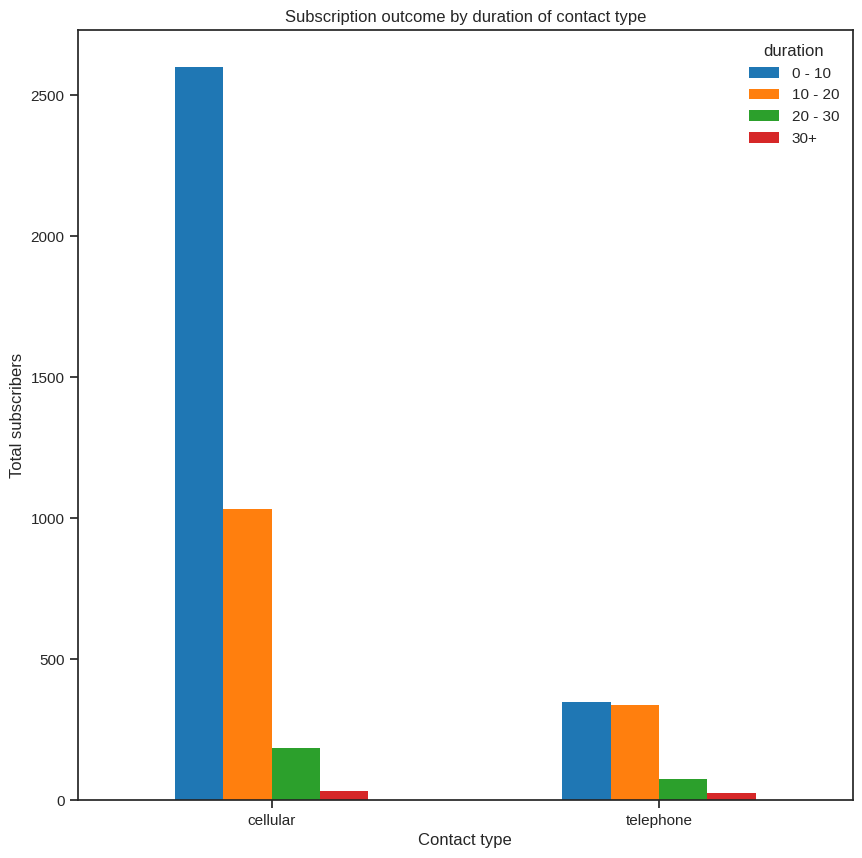

In [62]:
pd.crosstab(banking_yes.contact,banking_yes['duration']).plot(kind='bar', figsize = (10,10))
plt.title('Subscription outcome by duration of contact type')
plt.xlabel('Contact type')
plt.ylabel('Total subscribers')
plt.xticks(rotation = 0);

About 93% of subscribed customers reached via cell phone and 87% of those contacted by telephone had call durations between 0–20 minutes. This indicates that, regardless of contact method, keeping calls within the 0–20 minute range is the optimal duration for driving subscriptions.


---

## **Conclusion**

Marketing analytics continues to transform how organizations make decisions, helping them turn data into strategy. With the growing emphasis on data-driven insights, companies are leveraging analytics to optimize marketing outcomes, improve customer targeting, and increase overall performance.

I conducted an in-depth analysis of a large Portuguese bank’s marketing campaigns to understand the factors that influence client subscriptions to term deposits. By examining multiple parameters, we derived several key findings and recommendations:

- **Call Duration**: This was the most influential factor in client conversion. Calls lasting 20–30 minutes had the highest success rate, suggesting that both very short and overly long conversations are less effective.

- **Job Status:** The highest subscription rates were observed among students and retired individuals, likely due to specialized financial offerings such as student loans and retirement plans. Banks should consider extending tailored offers to other customer segments to boost conversions.

- **Education Level:** Campaign success rates generally increase with higher education levels, indicating that educated customers may be more responsive to financial products.

- **Loan Status:** Customers without personal loans were more likely to subscribe. Campaigns should prioritize this group to maximize success.

- **Contact Type:** Customers contacted via cellular phones showed a much higher subscription rate than those reached by traditional landlines. This approach is not only more effective but also cost-efficient.

- **Outcome of Previous Campaigns:** Interestingly, customers who were part of previous failed campaigns were still more likely to subscribe later compared to those never contacted. This suggests that even unsuccessful campaigns help build brand awareness and familiarity.

- **Contact Frequency:** The highest success rate occurred when customers were contacted 0–5 times, while over-contacting (more than 25 times in 10 months) led to zero conversions. To maintain customer trust and prevent fatigue, banks should limit contact frequency to bi-weekly at most.

In summary, marketing success in the banking sector depends heavily on leveraging past data and understanding customer behavior patterns. This analysis demonstrates how banks can design smarter, more efficient campaigns that balance personalization with customer comfort to achieve higher engagement and satisfaction.

----

In [67]:
!jupyter nbconvert --to pdf "Marketing_Optimization_and_Abuse_Prevention_in_Banking_Campaigns.ipynb"


[NbConvertApp] Converting notebook Marketing_Optimization_and_Abuse_Prevention_in_Banking_Campaigns.ipynb to pdf
/usr/local/share/jupyter/nbconvert/templates/latex/display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['application/javascript', 'application/vnd.bokehjs_load.v0+json']) is not able to be represented.
  ((*- endblock -*))
/usr/local/share/jupyter/nbconvert/templates/latex/display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  ((*- endblock -*))
/usr/local/share/jupyter/nbconvert/templates/latex/display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['application/javascript', 'application/vnd.bokehjs_exec.v0+json']) is not able to be represented.
  ((*- endblock -*))
[NbConvertApp] Support files will be in Marketing_Optimization_and_Abuse_Prevention_in_Banking_Campaigns_files/
[NbConvertApp] Making directory ./Marketing_Optimization_and_Abuse_Prevention_in_Ban